In [12]:
# Given a matrix A (nxn) and the vector x_true=(1,1,..,1).T (n)
import numpy as np

n = 10
A = np.random.randn(n,n)
x_true = np.ones((n,))

b = A@x_true

In [13]:
#a. Compute the right hand side of the linear system b = Ax_true



In [14]:
#b. Compute the condition number in 2-norm of the matrix A

p = 2
condition_number_2 = np.linalg.cond(A, p)

#b.1 It is ill-conditioned? 

# If the condition number is close to one, the matrix is well conditioned which means its inverse can be 
# computed with good accuracy. 
# If the condition number is large, then the matrix is said to be ill-conditioned. 
# Practically, such a matrix is almost singular, and the computation of its inverse, 
# or solution of a linear system of equations is prone to large numerical errors. 
# A matrix that is not invertible has the condition number equal to infinity.

#b.2 What if we use the infinite-norm instead of the 2-norm?

p = np.inf
condition_number_inf = np.linalg.cond(A, p)

In [15]:
#c. Solve the linear system Ax=b with the function np.linalg.solve

x = np.linalg.solve(A, b)

In [16]:
#d. Compute the relative error between the solution computed before and the true solution x_true.

E_rel = np.linalg.norm(x - x_true, 2) / np.linalg.norm(x_true, 2) #the relative error is big whenever k(A) is big

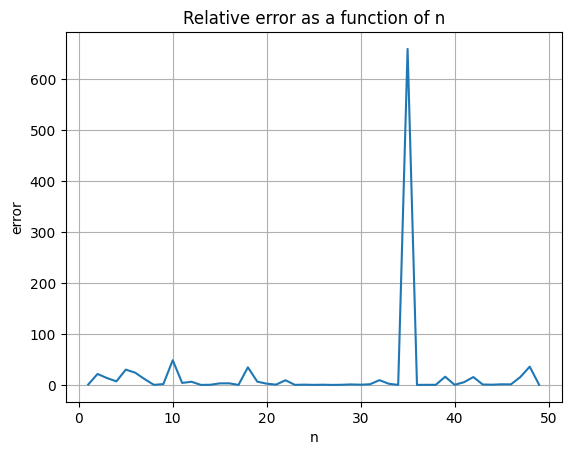

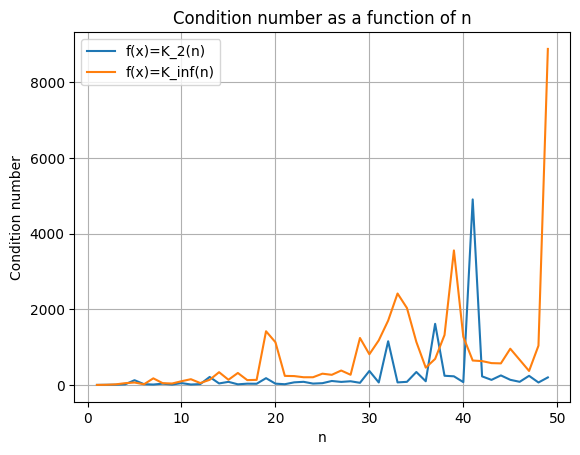

In [18]:
#e.1 Plot a graph with the relative errors as a function of n 
import matplotlib.pyplot as plt

def relative_error(x):
    e_rel = np.zeros(np.shape(x), )

    for n in x:
        A = np.random.randn(n,n)
        x_true = np.ones((n,))

        b = np.linalg.solve(A, x_true)
        x_sol = np.linalg.solve(A, b)

        e_rel[n-1] = np.linalg.norm(x_sol - x_true, 2) / np.linalg.norm(x_true, 2) 

    return e_rel

a = 1
b = 50

x = np.arange(a, b, 1)
y = relative_error(x)

plt.plot(x, y)
plt.title('Relative error as a function of n')
plt.xlabel('n')
plt.ylabel('error')
plt.grid()
plt.show()

#e.2 Plot the condition number in 2-norm K2(A) and in infinite-norm, as a function of n.

def cond(x, p):
    k = np.zeros(np.shape(x), )

    for n in x:
        A = np.random.randn(n,n)
        k[n-1] = np.linalg.cond(A, p)

    return k

a = 1
b = 50

x = np.arange(a, b, 1)

y1 = cond(x, 2)
y2 = cond(x, np.inf)

plt.plot(x, y1)
plt.plot(x, y2)
plt.title('Condition number as a function of n')
plt.xlabel('n')
plt.ylabel('Condition number')
plt.legend(['f(x)=K_2(n)', 'f(x)=K_inf(n)'])
plt.grid()
plt.show()